In [1]:

!pip install mlxtend
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules


import warnings
warnings.filterwarnings('ignore')



In [2]:
# Read data
data = pd.read_csv('Data.csv', delimiter=';', decimal=',', encoding='utf-8-sig')

# Display 5 rows
data.head()


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,3.39,17850.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  float64
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [4]:
data.describe()

,Quantity,Price,CustomerID
count,522064.000000,522064.000000,388023.000000
mean,10.090435,3.826801,15316.931710
std,161.110525,41.900599,1721.846964
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13950.000000
50%,3.000000,2.080000,15265.000000
75%,10.000000,4.130000,16837.000000
max,80995.000000,13541.330000,18287.000000


In [5]:
# as we are analyzing only for the UK region
df = data[data['Country'] == 'United Kingdom']  

In [6]:
df.shape

(487622, 7)

## Data Cleaning

In [7]:
# check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    133277
Country            0
dtype: int64

In [8]:
# Remove rows where 'Itemname' is missing
cleaned_data = df.dropna(subset=['Itemname'])

# Remove rows where 'CustomerID' is missing
cleaned_data = df.dropna(subset=['CustomerID'])

In [9]:
# Recheck for missing values after removal
MissingValues_after = cleaned_data.isnull().sum()

cleaned_data.shape, MissingValues_after

((354345, 7),
 BillNo        0
 Itemname      0
 Quantity      0
 Date          0
 Price         0
 CustomerID    0
 Country       0
 dtype: int64)

In [10]:
# Checking for duplicate records
duplicate_records = cleaned_data.duplicated().sum()

# Display the number of duplicate records found
duplicate_records

5157

In [11]:
# Remove duplicate records
cleaned_data_no_duplicates = cleaned_data.drop_duplicates()

# Confirm removal of duplicates by rechecking
duplicate_records_after = cleaned_data_no_duplicates.duplicated().sum()
remaining_records = cleaned_data_no_duplicates.shape[0]

remaining_records, duplicate_records_after

(349188, 0)

In [12]:
# Identifying and removing cancelled transactions
cancelled_transactions = cleaned_data_no_duplicates['BillNo'].str.contains('C', na=False)
cancelled_transactions.head(5)
cleaned_data_no_cancellations = cleaned_data_no_duplicates[~cancelled_transactions]

cleaned_data_no_cancellations.shape

(349188, 7)

In [13]:
df=cleaned_data_no_cancellations.loc[(cleaned_data_no_cancellations['Itemname']!='POSTAGE')&(cleaned_data_no_cancellations['Itemname']!='DOTCOM POSTAGE')&(cleaned_data_no_cancellations['Itemname']!='Adjust bad debt')&
          (cleaned_data_no_cancellations['Itemname']!='Manual')]

In [14]:
df=df.loc[df['Quantity']>0]
df=df.loc[df['Price']>0]

In [15]:
df

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522044,581585,FAIRY TALE COTTAGE NIGHT LIGHT,12,09.12.2011 12:31,1.95,15804.0,United Kingdom
522045,581586,LARGE CAKE STAND HANGING STRAWBERY,8,09.12.2011 12:49,2.95,13113.0,United Kingdom
522046,581586,SET OF 3 HANGING OWLS OLLIE BEAK,24,09.12.2011 12:49,1.25,13113.0,United Kingdom
522047,581586,RED RETROSPOT ROUND CAKE TINS,24,09.12.2011 12:49,8.95,13113.0,United Kingdom


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348878 entries, 0 to 522048
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      348878 non-null  object 
 1   Itemname    348878 non-null  object 
 2   Quantity    348878 non-null  int64  
 3   Date        348878 non-null  object 
 4   Price       348878 non-null  float64
 5   CustomerID  348878 non-null  float64
 6   Country     348878 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 21.3+ MB


In [17]:
# Convert CustomerID data type to object (string)
df['CustomerID'] = df['CustomerID'].astype('object')

In [18]:
# Splitting data into year and month
df['Year']=df['Date'].apply(lambda x:x.split('.')[2])
df['Year']=df['Year'].apply(lambda x:x.split(' ')[0])
df['Month']=df['Date'].apply(lambda x:x.split('.')[1])
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,2.55,17850.0,United Kingdom,2010,12
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,2.75,17850.0,United Kingdom,2010,12
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12


In [19]:
# Creating a Total price 
df['Price']=df['Price'].apply(str).str.replace(',','.').astype('float64')
df['Total price']=df.Quantity*df.Price
df.head()


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,Total price
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,2.55,17850.0,United Kingdom,2010,12,15.30
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,2.75,17850.0,United Kingdom,2010,12,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12,20.34


In [20]:
#Checking the Total price in each month.
df.groupby(['Year','Month'])['Total price'].sum()

Year  Month
2010  12       496179.670
2011  01       440737.980
      02       354507.310
      03       465449.620
      04       406064.551
      05       541810.290
      06       523001.210
      07       483261.851
      08       494069.250
      09       789596.372
      10       812133.260
      11       968108.050
      12       469344.460
Name: Total price, dtype: float64

In [21]:
#Delete records for 2010
df=df.loc[df['Year']!='2010']

In [22]:
df.shape

(325455, 10)

## EDA

Total number of unique items: 3738
Total number of transactions: 15304
Total number of unique customers: 3808


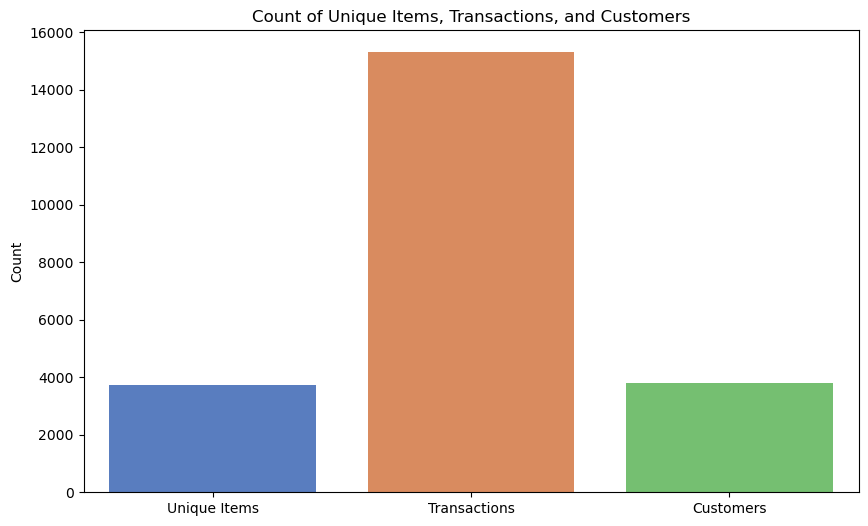

In [23]:
# Count of Unique Items, Transactions, and Customers
unique_items_count = df['Itemname'].nunique()
unique_transactions_count = df['BillNo'].nunique()
unique_customers_count = df['CustomerID'].nunique()

# Print the counts
print(f"Total number of unique items: {unique_items_count}")
print(f"Total number of transactions: {unique_transactions_count}")
print(f"Total number of unique customers: {unique_customers_count}")

# Plotting
counts = [unique_items_count, unique_transactions_count, unique_customers_count]
labels = ['Unique Items', 'Transactions', 'Customers']

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=counts, palette='muted')
plt.title('Count of Unique Items, Transactions, and Customers')
plt.ylabel('Count')
plt.show()

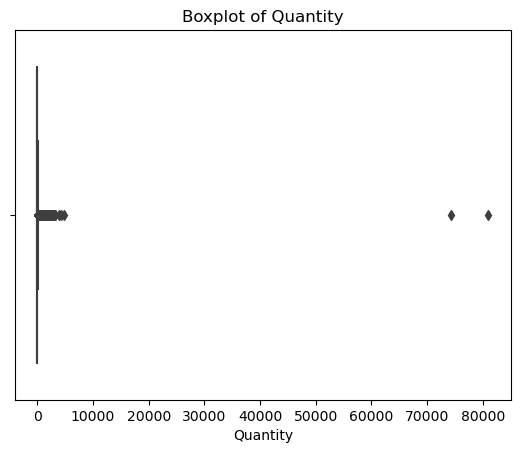

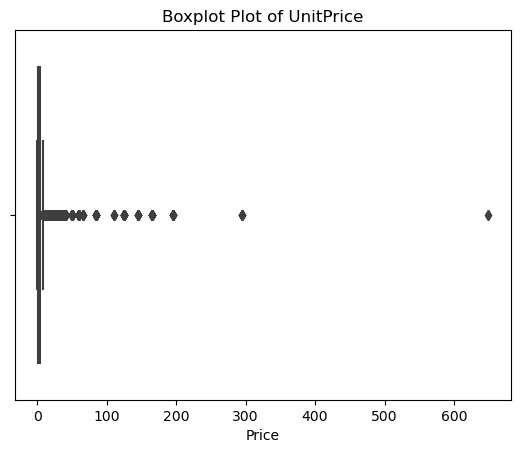

In [24]:
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

sns.boxplot(x=df['Price'])
plt.title('Boxplot Plot of UnitPrice')
plt.show()

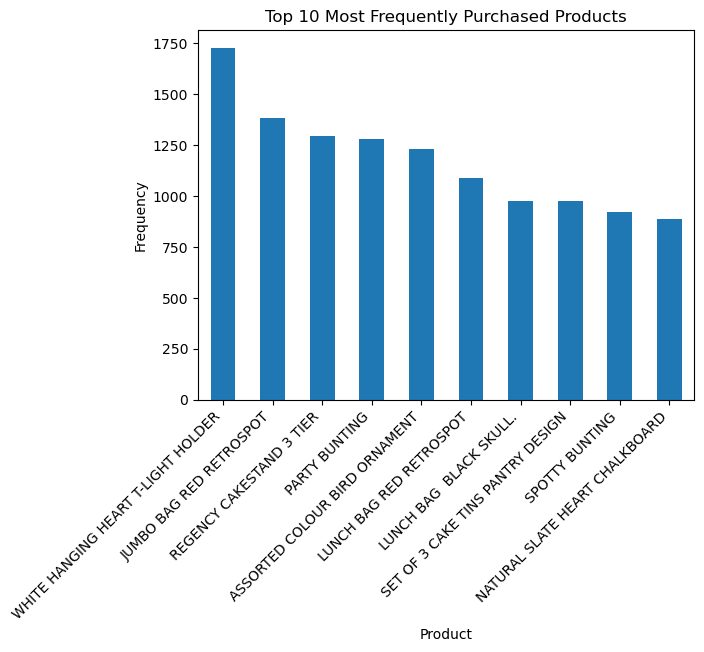

In [25]:
top_products = df['Itemname'].value_counts().head(10)


top_products.plot(kind='bar')
plt.title('Top 10 Most Frequently Purchased Products')
plt.ylabel('Frequency')
plt.xlabel('Product')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()

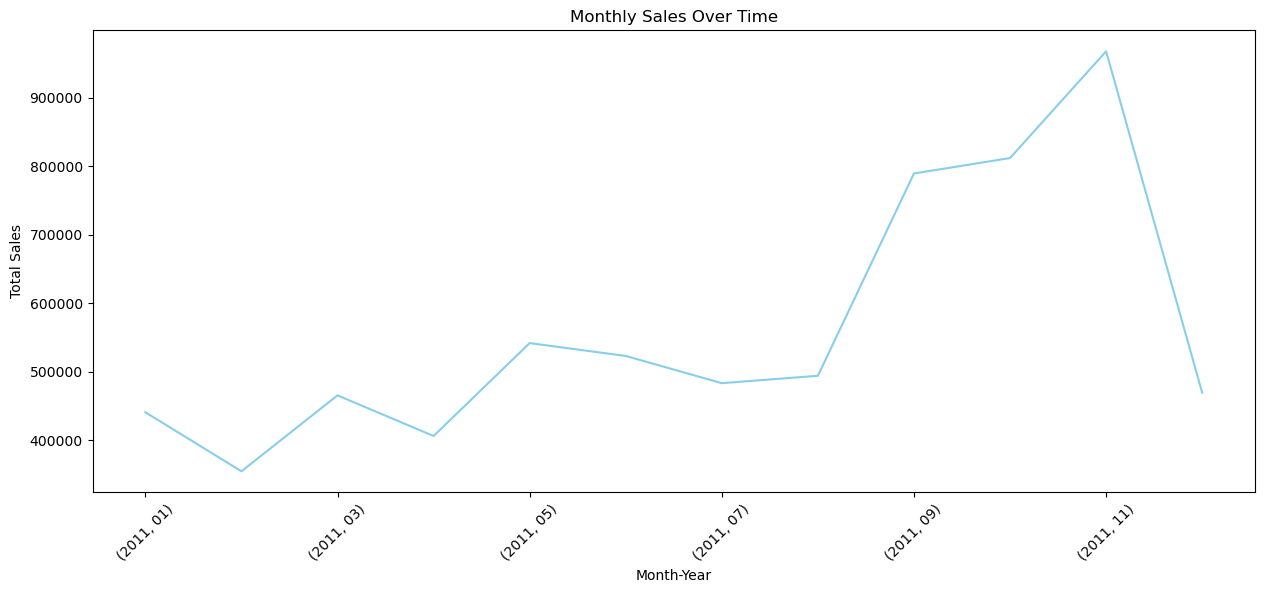

In [26]:
# Visualization of Sales Trends

plt.figure(figsize=(15, 6))
df.groupby(['Year', 'Month'])['Total price'].sum().plot(kind='line', color='skyblue')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

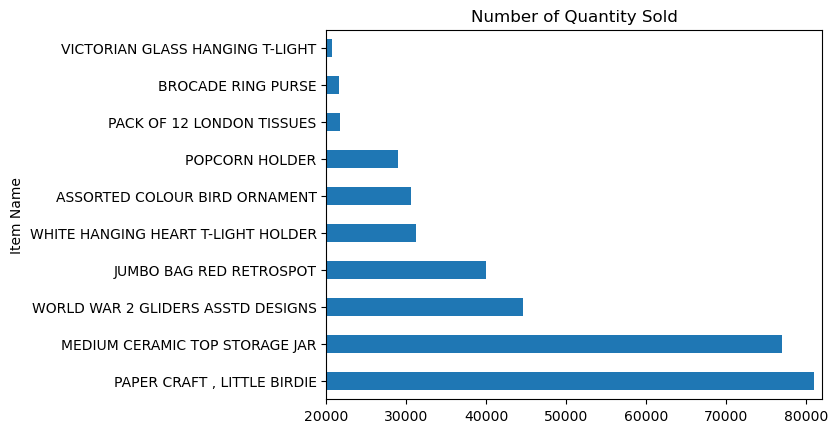

In [27]:
# Top 10 most sold products by quantity
df.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='barh', title='Number of Quantity Sold')
plt.ylabel('Item Name')
plt.xlim(20000, 82000)
plt.show()


## RFM Analysis


Now, we'are going to analyze customers' recencies, frequencies and monetaries then cluster them.

R = Recency F = Frequency M = Monetary

In [28]:
df.Date.unique()

array(['04.01.2011 10:00', '04.01.2011 10:22', '04.01.2011 10:23', ...,
       '09.12.2011 12:25', '09.12.2011 12:31', '09.12.2011 12:49'],
      dtype=object)

In [29]:
# Let's assume that today is 01.01.2012

Today = "2012-01-01"
Today = pd.to_datetime(Today)
df["Date"] = pd.to_datetime(df["Date"])

In [30]:
# Recency

recency_table = df.groupby(["CustomerID"]).agg({"Date": lambda x: ((Today - x.max()).days)})
recency_table.columns = ["Recency"]
recency_table.head(5)

,Recency
CustomerID,
12346.0,347
12747.0,44
12748.0,26
12749.0,44
12820.0,66


In [31]:
# Frequency

frequency_table = df.drop_duplicates(subset = "BillNo").groupby(["CustomerID"])[["BillNo"]].count()
frequency_table.columns = ["Frequency"]
frequency_table.head(5)

,Frequency
CustomerID,
12346.0,1
12747.0,9
12748.0,171
12749.0,5
12820.0,4


In [32]:
# Monetary

df["Total_Price"] = df["Quantity"] * df["Price"]
monetary_table = df.groupby(["CustomerID"])[["Total_Price"]].sum()
monetary_table.columns = ["Monetary"]
monetary_table.head(5)

,Monetary
CustomerID,
12346.0,77183.60
12747.0,3489.74
12748.0,27508.01
12749.0,4090.88
12820.0,942.34


In [33]:
rfm = pd.concat([recency_table, frequency_table, monetary_table], axis = 1)
rfm.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,1,77183.60
12747.0,44,9,3489.74
12748.0,26,171,27508.01
12749.0,44,5,4090.88
12820.0,66,4,942.34


In [34]:

#Scaling the data

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
rfm_scaled = scale.fit_transform(rfm)

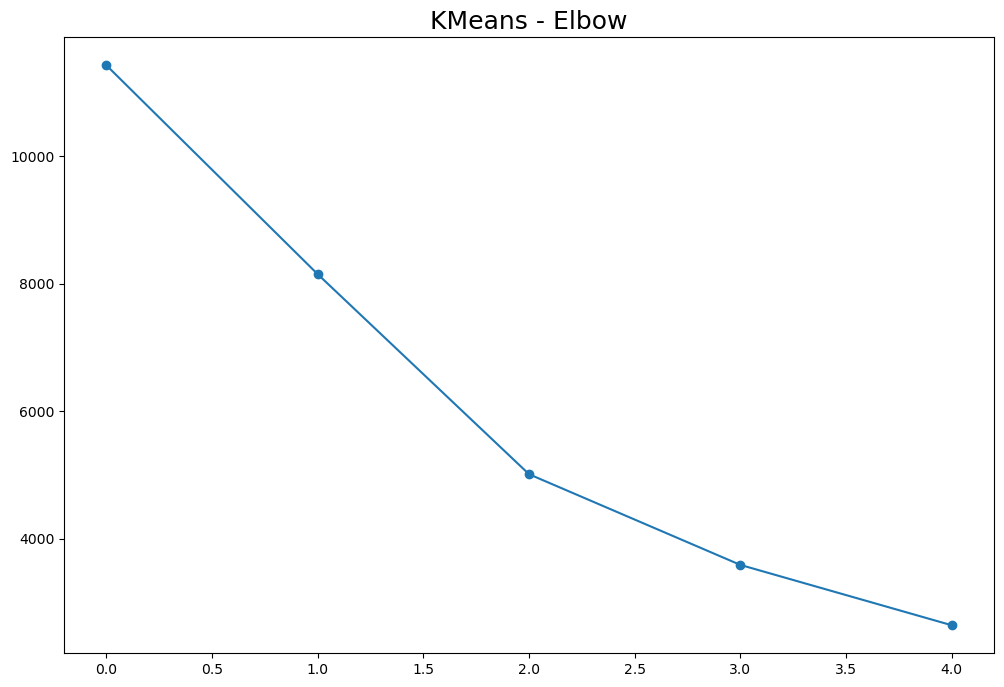

In [35]:
inertia = []

from sklearn.cluster import KMeans
for i in np.arange(1,6):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (12,8))    
plt.plot(inertia, marker = "o")
plt.title("KMeans - Elbow", fontsize = 18);

In [36]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(rfm_scaled)
rfm["Cluster_No"] = (kmeans.labels_ + 1)

In [37]:
from sklearn.cluster import KMeans

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit KMeans on the scaled data
kmeans.fit(rfm_scaled)

# Assign cluster labels to your original DataFrame
rfm["Cluster_No"] = kmeans.labels_ + 1


In [38]:
rfm.head(5)

,Recency,Frequency,Monetary,Cluster_No
CustomerID,,,,
12346.0,347,1,77183.60,3
12747.0,44,9,3489.74,1
12748.0,26,171,27508.01,3
12749.0,44,5,4090.88,1
12820.0,66,4,942.34,1


In [39]:
rfm.groupby(["Cluster_No"])[["Recency", "Frequency", "Monetary"]].mean()

,Recency,Frequency,Monetary
Cluster_No,,,
1,64.663947,4.570846,1711.532071
2,243.084715,1.513812,481.886106
3,47.807692,51.423077,61940.978077


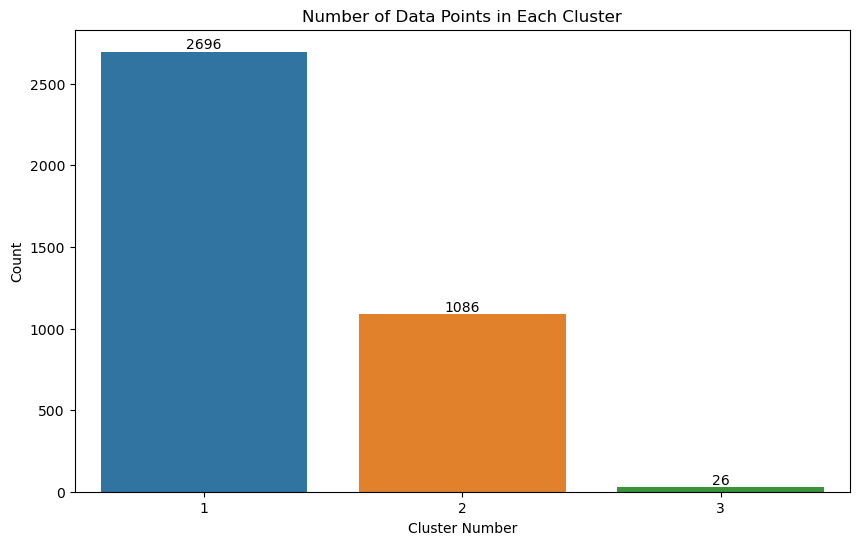

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


# Add the cluster labels to your original DataFrame
rfm['Cluster'] = rfm['Cluster_No']

# Count the number of data points in each cluster
cluster_counts = rfm['Cluster_No'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(10, 6))
a = sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Number of Data Points in Each Cluster')
plt.xlabel('Cluster Number')
plt.ylabel('Count')
for bars in a.containers:
    a.bar_label(bars)
plt.show()


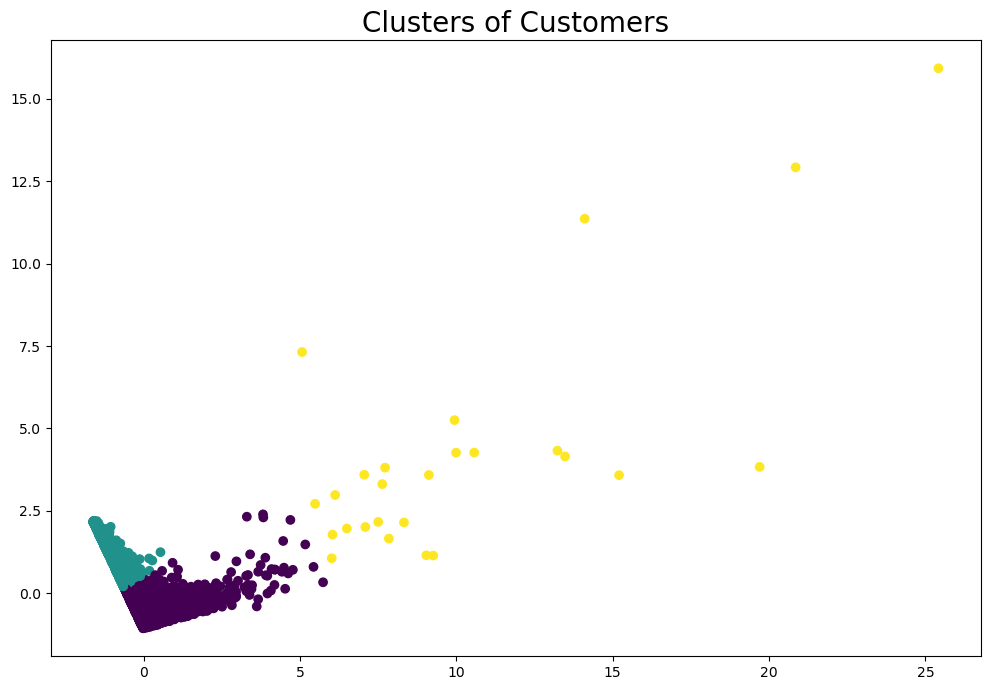

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca = pca.fit_transform(rfm_scaled)
plt.figure(figsize = (12,8))
plt.scatter(pca[:,0], pca[:,1], c = kmeans.labels_)
plt.title("Clusters of Customers", fontsize = 20);

## Apiori algorithm

In [42]:
data = df.groupby(["BillNo", "Itemname"])[["Quantity"]].sum(
).unstack().reset_index().fillna(0).set_index("BillNo")

In [43]:
# Pivot the dataset to get a basket format
data = (df.groupby(['BillNo', 'Itemname'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('BillNo'))

In [44]:
data.head(5)

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
539993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Convert quantities to 1 if an item was bought, 0 otherwise
def encode_units(x):
    return 1 if x >= 1 else 0

In [46]:
data_s = data.applymap(encode_units)

In [47]:
def num(x):
    if x <= 0:
        return 0
    elif x >=1:
        return 1
basket = data.applymap(num)

In [48]:
# Remove the postage column as it is not a product
data_s.drop('POSTAGE', inplace=True, axis=1, errors='ignore')

data_s.head()

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
539993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
basket.nunique()

Itemname
10 COLOUR SPACEBOY PEN              2
12 COLOURED PARTY BALLOONS          2
12 DAISY PEGS IN WOOD BOX           2
12 EGG HOUSE PAINTED WOOD           2
12 HANGING EGGS HAND PAINTED        2
                                   ..
ZINC T-LIGHT HOLDER STARS SMALL     2
ZINC TOP  2 DOOR WOODEN SHELF       2
ZINC WILLIE WINKIE  CANDLE STICK    2
ZINC WIRE KITCHEN ORGANISER         2
ZINC WIRE SWEETHEART LETTER TRAY    2
Length: 3738, dtype: int64

In [50]:
!pip install mlxtend

In [51]:
from mlxtend.frequent_patterns import apriori

# Apply the Apriori algorithm to find frequent itemsets
# Adjust the min_support value as needed
frequent_set = apriori(data_s, min_support=0.02, use_colnames=True)

# Display the frequent itemsets
frequent_set.head()


,support,itemsets
0,0.022478,(3 STRIPEY MICE FELTCRAFT)
1,0.038225,(6 RIBBONS RUSTIC CHARM)
2,0.024699,(60 CAKE CASES VINTAGE CHRISTMAS)
3,0.035546,(60 TEATIME FAIRY CAKE CASES)
4,0.027052,(72 SWEETHEART FAIRY CAKE CASES)


In [54]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules from the frequent itemsets
# Adjust the min_threshold for confidence as needed
rules = association_rules(frequent_set, metric="confidence", min_threshold=0.02)

# Display the rules
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.040643,0.045609,0.026790,0.659164,14.452501,0.024937,2.800147,0.970241
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.045609,0.040643,0.026790,0.587393,14.452501,0.024937,2.325108,0.975290
2,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.048484,0.040970,0.029927,0.617251,15.066036,0.027940,2.505636,0.981198
3,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.040970,0.048484,0.029927,0.730463,15.066036,0.027940,3.530180,0.973510
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.032083,0.038029,0.026268,0.818737,21.529133,0.025048,5.307052,0.985158
5,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.038029,0.032083,0.026268,0.690722,21.529133,0.025048,3.129598,0.991248
6,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.041950,0.038029,0.029665,0.707165,18.595283,0.028070,3.285028,0.987655
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.038029,0.041950,0.029665,0.780069,18.595283,0.028070,4.356134,0.983630
8,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.053973,0.045152,0.022739,0.421308,9.330955,0.020302,1.650010,0.943768
9,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.045152,0.053973,0.022739,0.503618,9.330955,0.020302,1.905845,0.935049
